In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [16]:
plt.rc('font', size=22) #controls default text size
plt.rc('axes', titlesize=22) #fontsize of the title
plt.rc('axes', labelsize=22) #fontsize of the x and y labels
plt.rc('xtick', labelsize=22) #fontsize of the x tick labels
plt.rc('ytick', labelsize=22) #fontsize of the y tick labels
plt.rc('legend', fontsize=22) #fontsize of the legend
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
data = pd.read_csv('Matches_with_bets2.csv')

In [4]:
data

,tourney_name,surface,tourney_level,tourney_date,winner_name_x,loser_name_x,round,score,year,winner_rank,loser_rank,target,winner_lr,loser_lr,winner_dt,loser_dt,winner_rf,loser_rf,winner_xgb,loser_xgb,winner_knn,loser_knn,winner_svm,loser_svm,winner_nb,loser_nb,winner_nn,loser_nn,winner_name2,loser_name2,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL,min,winner_name_y,loser_name_y
0,Brisbane,Hard,Other,20160104.0,Mikhail Kukushkin,Denis Istomin,R32,6-2 7-5,2016.0,65.0,61.0,1,0.437077,0.562923,0.444165,0.555835,0.362359,0.637641,0.386247,0.613753,0.380952,0.619048,0.327385,0.672615,0.158810,0.841190,0.408565,0.591435,Kukushkin,Istomin,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3.0,Kukushkin M.,Istomin D.,65.0,61.0,762.0,781.0,6.0,2.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.00,1.72,2.05,1.72,2.10,1.73,2.14,1.78,2.18,1.79,2.09,1.71,2016-01-04,Kukushkin,Istomin
1,Doha,Hard,Other,20160104.0,Robin Haase,Aslan Karatsev,R32,5-7 6-1 7-5,2016.0,66.0,195.0,0,0.635233,0.364767,0.682644,0.317356,0.742628,0.257372,0.726341,0.273659,0.658730,0.341270,0.767187,0.232813,0.980017,0.019983,0.700652,0.299348,Haase,Karatsev,3,Doha,Qatar Exxon Mobil Open,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Haase R.,Karatsev A.,66.0,195.0,740.0,254.0,5.0,7.0,6.0,1.0,7.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.50,2.50,1.52,2.45,1.53,2.50,1.50,2.76,1.58,2.76,1.52,2.49,2016-01-04,Haase,Karatsev
2,Brisbane,Hard,Other,20160104.0,Radek Stepanek,Dusan Lajovic,R32,6-0 6-3,2016.0,197.0,76.0,1,0.499156,0.500844,0.643597,0.356403,0.575835,0.424165,0.520601,0.479399,0.539683,0.460317,0.551982,0.448018,0.873468,0.126532,0.579895,0.420105,Stepanek,Lajovic,1,Brisbane,Brisbane International,2016-01-05,ATP250,Outdoor,Hard,1st Round,3.0,Stepanek R.,Lajovic D.,197.0,76.0,252.0,678.0,6.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.00,1.72,1.90,1.80,2.00,1.80,2.00,1.89,2.05,1.90,1.94,1.82,2016-01-04,Stepanek,Lajovic
3,Chennai,Hard,Other,20160104.0,Luca Vanni,Jan Lennard Struff,R32,6-4 7-6,2016.0,106.0,107.0,0,0.493474,0.506526,0.555835,0.444165,0.450242,0.549758,0.390731,0.609269,0.563492,0.436508,0.598594,0.401406,0.740654,0.259346,0.406331,0.593669,Vanni,Lennard Struff,2,Chennai,Chennai Open,2016-01-05,ATP250,Outdoor,Hard,1st Round,3.0,Vanni L.,Struff J.L.,106.0,107.0,552.0,547.0,6.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.20,1.61,2.10,1.70,2.00,1.80,2.10,1.81,2.20,1.81,2.09,1.71,2016-01-04,Vanni,Lennard Struff
4,Doha,Hard,Other,20160104.0,Andrey Kuznetsov,Marsel Ilhan,R32,6-2 6-4,2016.0,79.0,114.0,0,0.600416,0.399584,0.682644,0.317356,0.627727,0.372273,0.667556,0.332444,0.603175,0.396825,0.709722,0.290278,0.727154,0.272846,0.612410,0.387590,Kuznetsov,Ilhan,3,Doha,Qatar Exxon Mobil Open,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Kuznetsov An.,Ilhan M.,79.0,114.0,663.0,520.0,6.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.50,2.50,1.52,2.45,1.53,2.38,1.59,2.49,1.62,2.62,1.54,2.43,2016-01-04,Kuznetsov,Ilhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18151,Tour Finals,Hard,Other,20231113.0,Jannik Sinner,Stefanos Tsitsipas,RR,6-4 6-4,2023.0,4.0,6.0,1,0.649353,0.350647,0.700192,0.299808,0.687895,0.312105,0.716252,0.283748,0.619048,0.380952,0.727980,0.272020,0.912216,0.087784,0.676799,0.323201,Sinner,Tsitsipas,64,Turin,Masters Cup,2023-11-12,Masters Cup,Indoor,Hard,Round Robin,3.0,Sinner J.,Tsitsipas S.,4.0,6.0,5490.0,4435.0,6.0,4.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.36,3.20,NaN,NaN,NaN,NaN,1.39,3.26,1.44,3.33,1.36,3.14,2023-11-12,Sinner,Tsitsipas
18152,Tour Finals,Hard,Other,20

In [5]:
data = data[data['PSW'].isnull() == False]

In [6]:
data['winner_bet_proba'] = 1/data['PSW']
data['loser_bet_proba'] = 1/data['PSL']

C:\Users\krych\AppData\Local\Temp\ipykernel_14964\3845915480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['winner_bet_proba'] = 1/data['PSW']
C:\Users\krych\AppData\Local\Temp\ipykernel_14964\3845915480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loser_bet_proba'] = 1/data['PSL']


In [7]:
data = data.sort_values('Date')

In [8]:
data2 = data[data['year']<2018]

In [9]:
data2

,tourney_name,surface,tourney_level,tourney_date,winner_name_x,loser_name_x,round,score,year,winner_rank,loser_rank,target,winner_lr,loser_lr,winner_dt,loser_dt,winner_rf,loser_rf,winner_xgb,loser_xgb,winner_knn,loser_knn,winner_svm,loser_svm,winner_nb,loser_nb,winner_nn,loser_nn,winner_name2,loser_name2,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL,min,winner_name_y,loser_name_y,winner_bet_proba,loser_bet_proba
18,Brisbane,Hard,Other,20160104.0,Denis Kudla,John Patrick Smith,R32,4-6 6-3 6-2,2016.0,69.0,129.0,0,0.645643,0.354357,0.682644,0.317356,0.658942,0.341058,0.635903,0.364097,0.634921,0.365079,0.741119,0.258881,0.985013,1.498655e-02,0.646818,0.353182,Kudla,Patrick Smith,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Kudla D.,Smith J.P.,69.0,129.0,719.0,459.0,4.0,6.0,6.0,3.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.53,2.37,1.58,2.35,1.53,2.50,1.63,2.40,1.63,2.50,1.57,2.37,2016-01-04,Kudla,Patrick Smith,0.613497,0.416667
1,Doha,Hard,Other,20160104.0,Robin Haase,Aslan Karatsev,R32,5-7 6-1 7-5,2016.0,66.0,195.0,0,0.635233,0.364767,0.682644,0.317356,0.742628,0.257372,0.726341,0.273659,0.658730,0.341270,0.767187,0.232813,0.980017,1.998346e-02,0.700652,0.299348,Haase,Karatsev,3,Doha,Qatar Exxon Mobil Open,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Haase R.,Karatsev A.,66.0,195.0,740.0,254.0,5.0,7.0,6.0,1.0,7.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.50,2.50,1.52,2.45,1.53,2.50,1.50,2.76,1.58,2.76,1.52,2.49,2016-01-04,Haase,Karatsev,0.666667,0.362319
33,Doha,Hard,Other,20160104.0,Novak Djokovic,Dustin Brown,R32,6-2 6-2,2016.0,1.0,118.0,1,0.979944,0.020056,0.841724,0.158276,0.909912,0.090088,0.952631,0.047369,0.952381,0.047619,0.779566,0.220434,1.000000,4.989773e-07,0.965688,0.034312,Djokovic,Brown,3,Doha,Qatar Exxon Mobil Open,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Djokovic N.,Brown D.,1.0,118.0,16585.0,493.0,6.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.01,21.00,1.01,13.00,1.02,15.00,1.01,24.11,1.03,33.50,1.01,16.74,2016-01-04,Djokovic,Brown,0.990099,0.041477
21,Brisbane,Hard,Other,20160104.0,Hyeon Chung,Sam Groth,R32,7-6 6-4,2016.0,51.0,60.0,0,0.484931,0.515069,0.555835,0.444165,0.551408,0.448592,0.467863,0.532137,0.412698,0.587302,0.388870,0.611130,0.586525,4.134753e-01,0.473408,0.526592,Chung,Groth,1,Brisbane,Brisbane International,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Chung H.,Groth S.,51.0,60.0,817.0,782.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.83,1.83,1.82,1.90,1.73,2.10,1.93,1.96,1.93,2.10,1.82,1.95,2016-01-04,Chung,Groth,0.518135,0.510204
4,Doha,Hard,Other,20160104.0,Andrey Kuznetsov,Marsel Ilhan,R32,6-2 6-4,2016.0,79.0,114.0,0,0.600416,0.399584,0.682644,0.317356,0.627727,0.372273,0.667556,0.332444,0.603175,0.396825,0.709722,0.290278,0.727154,2.728458e-01,0.612410,0.387590,Kuznetsov,Ilhan,3,Doha,Qatar Exxon Mobil Open,2016-01-04,ATP250,Outdoor,Hard,1st Round,3.0,Kuznetsov An.,Ilhan M.,79.0,114.0,663.0,520.0,6.0,2.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.50,2.50,1.52,2.45,1.53,2.38,1.59,2.49,1.62,2.62,1.54,2.43,2016-01-04,Kuznetsov,Ilhan,0.628931,0.401606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,Tour Finals,Hard,Season-ending events,20171113.0,David Goffin,Dominic Thiem,RR,6-4 6-1,2017.0,8.0,4.0,0,0.594346,0.405654,0.603532,0.396468,0.544941,0.455059,0.573924,0.426076,0.523810,0.476190,0.641467,0.358533,0.639609,3.603908e-01,0.574946,0.425054,Goffin,Thiem,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3.0,Goffin D.,Thiem D.,8.0,4.0,2975.0,3815.0,6.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

## Bet on favorite and underdog

In [13]:
days = data2['Date'].unique()

In [372]:
def naive_strategy_fovorite(row, unit):
    if row['PSW'] < row['PSL']: #we bet on favorite and he wins
        return row['PSW'] * unit -unit
    else:
        return -unit

In [373]:
def naive_strategy_underdog(row, unit):
    if row['PSW'] > row['PSL']: #we bet on underdog and he wins
        return row['PSW'] * unit -unit
    else:
        return -unit

In [374]:
money_fav = 1
money_und = 1
all_returns_favorite = [1]
all_returns_underdog = [1]
for day in days:
    d = data2[data2['Date'] == day]
    
    returns_favorite = []
    returns_underdog = []
    
    for index, row in d.iterrows():
        bet_fav = money_fav * 0.01
        bet_und = money_und * 0.01
        r1 = naive_strategy_fovorite(row, bet_fav)
        r2 = naive_strategy_underdog(row, bet_und)
        
        returns_favorite.append(r1)
        returns_underdog.append(r2)
    
    money_fav = money_fav + sum(returns_favorite)  
    money_und = money_und + sum(returns_underdog) 
    all_returns_favorite.append(money_fav)
    all_returns_underdog.append(money_und)
    


In [14]:
ds = pd.to_datetime(np.insert(days, 0, '2016-01-03')).to_numpy()

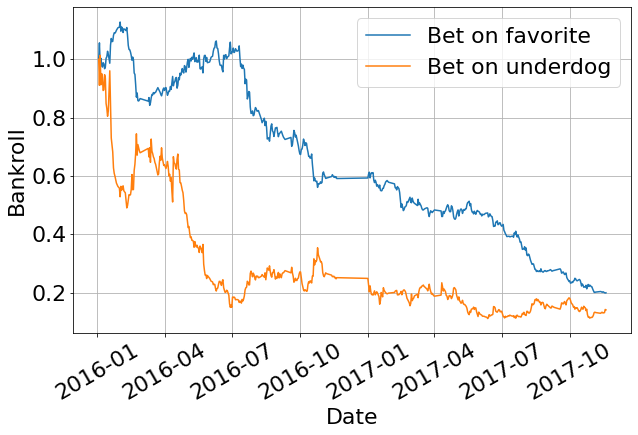

In [390]:
plt.plot(ds,all_returns_favorite,label='Bet on favorite')
plt.plot(ds,all_returns_underdog,label='Bet on underdog')
plt.legend()
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\naive.pdf',bbox_inches='tight')

## Betting with model

In [323]:
def model_betting(model):
    money = 1
    all_returns = [1]
    skip = 0

    for day in days:
        d = data2[data2['Date'] == day]

        returns = []

        for index, row in d.iterrows():
            bet = money * 0.01

            if max(row['winner_'+model], row['loser_'+model]) > max(row['winner_bet_proba'],row['loser_bet_proba']): #we make a bet
                if row['winner_'+model] > row['loser_'+model]: #we make a bet and win
                    r = row['PSW'] * bet - bet
                else:
                    r = - bet
            else:
                r = 0
                skip += 1

            returns.append(r)

        money = money + sum(returns)   
        all_returns.append(money)
    print(skip/len(data2))
    print(money)
    return all_returns

0.6067223292656818
0.5408442515784062


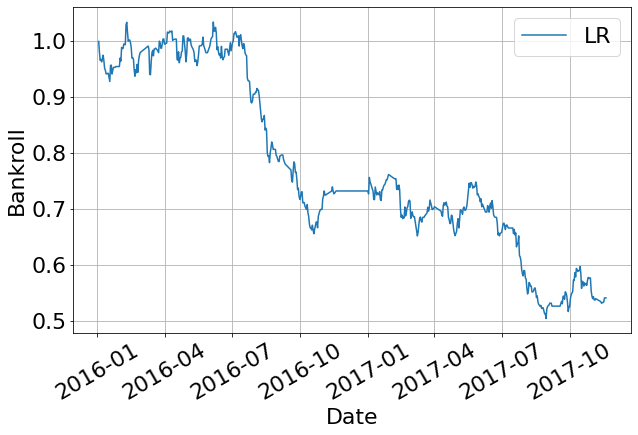

In [400]:
plt.plot(ds,model_betting('lr'),label='LR')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_lr.pdf',bbox_inches='tight')

0.6182830229073004
0.9390364460434467


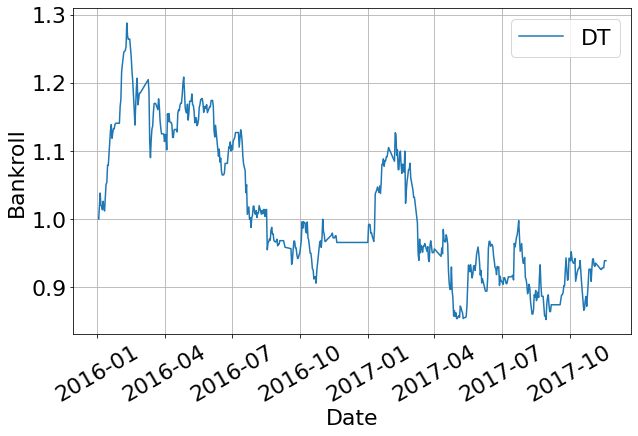

In [401]:
plt.plot(ds,model_betting('dt'),label='DT')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_dt.pdf',bbox_inches='tight')

0.6698779704560052
0.8386545950840071


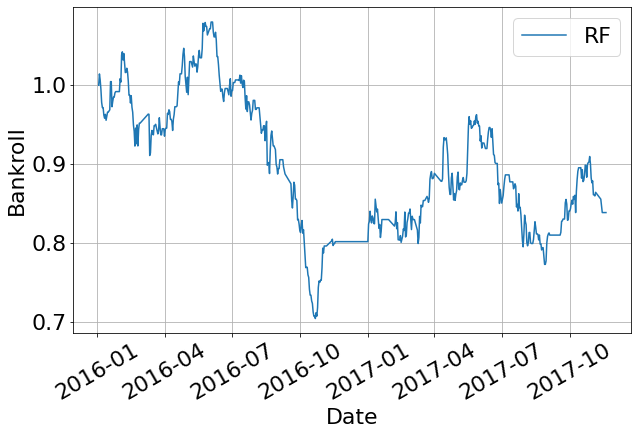

In [402]:
plt.plot(ds,model_betting('rf'),label='RF')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_rf.pdf',bbox_inches='tight')

0.6039391993149219
0.7509748054624648


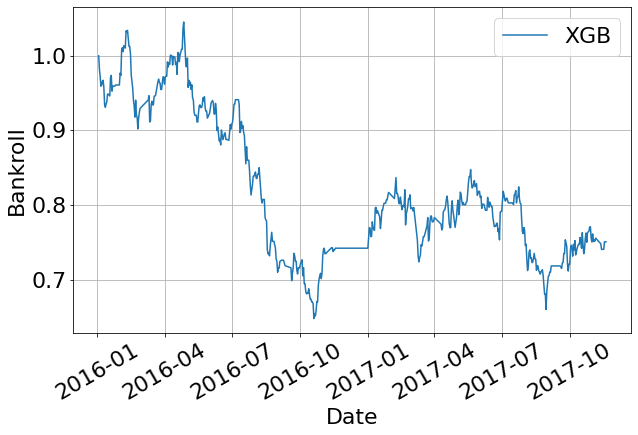

In [403]:
plt.plot(ds,model_betting('xgb'),label='XGB')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_xgb.pdf',bbox_inches='tight')

0.7323913508884607
0.6795424974267307


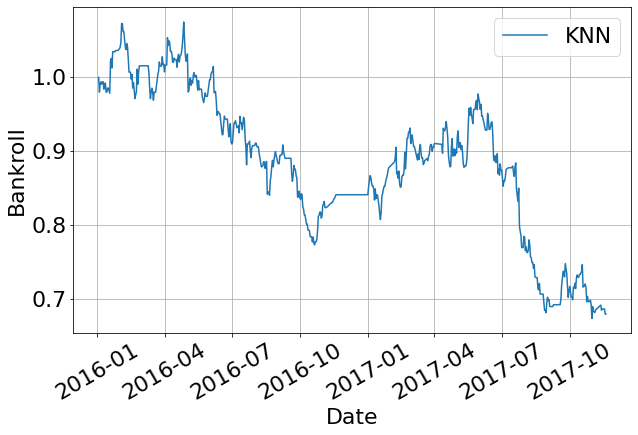

In [404]:
plt.plot(ds,model_betting('knn'),label='KNN')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_knn.pdf',bbox_inches='tight')

0.5386426889317063
0.5320536459239678


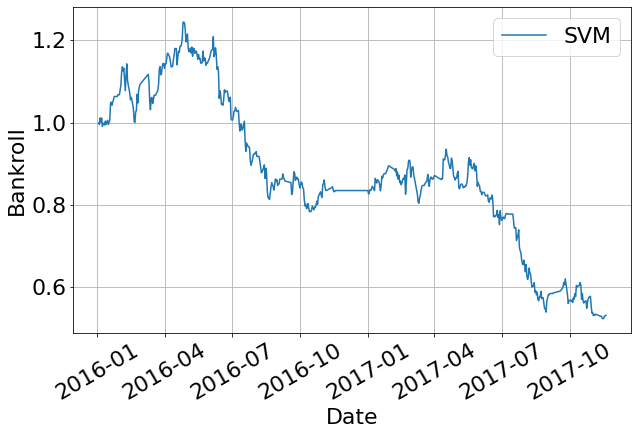

In [405]:
plt.plot(ds,model_betting('svm'),label='SVM')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_svm.pdf',bbox_inches='tight')

0.07792763862128024
0.4153012664220973


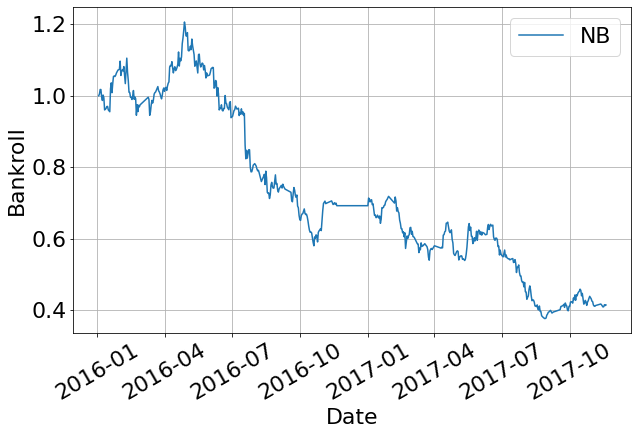

In [406]:
plt.plot(ds,model_betting('nb'),label='NB')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_nb.pdf',bbox_inches='tight')

0.5893812888032541
0.8623485528967925


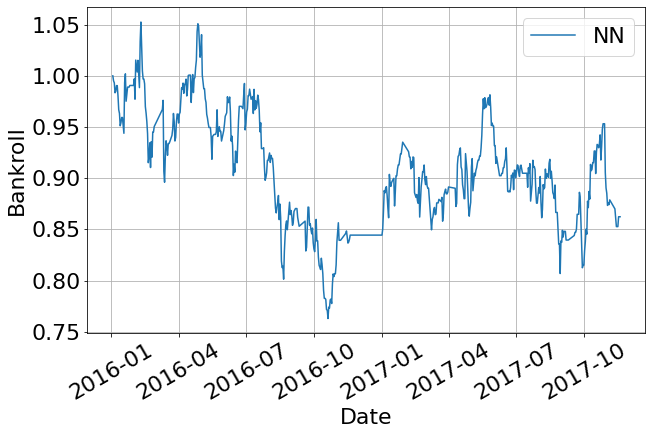

In [407]:
plt.plot(ds,model_betting('nn'),label='NN')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\model_nn.pdf',bbox_inches='tight')

## Kelly

In [10]:
def kelly(model):
    money = 1
    all_returns = [1]
    
    for day in days:
        d = data2[data2['Date'] == day]

        returns = []

        for index, row in d.iterrows():

            if max(row['winner_'+model], row['loser_'+model]) > max(row['winner_bet_proba'],row['loser_bet_proba']): #we make a bet
                if row['winner_'+model] > row['loser_'+model]: #we make a bet and win
                    bet = money * (row['winner_'+model]*row['PSW']-1)/(row['PSW']-1)
                    r = row['PSW'] * bet - bet
                else:
                    bet = money * (row['loser_'+model]*row['PSL']-1)/(row['PSL']-1)
                    r = - bet
            else:
                r = 0

            returns.append(r)

        money = money + sum(returns)   
        all_returns.append(money)
        
    print(money)
    return all_returns

-5.3714166391455576e-17


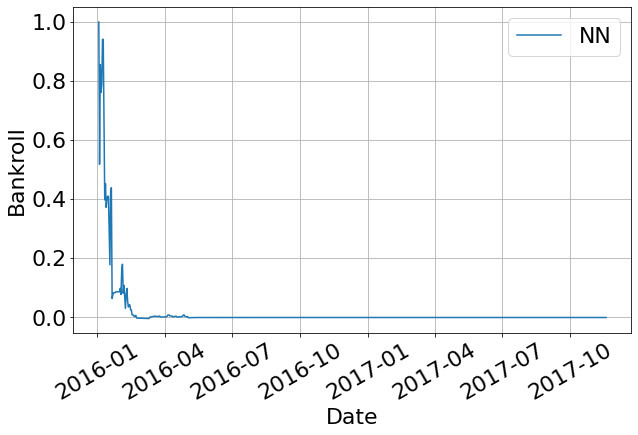

In [17]:
plt.plot(ds,kelly('nn'),label='NN')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly1_nn.pdf',bbox_inches='tight')

## fractional kelly

In [336]:
def kelly(model, f):
    money = 1
    all_returns = [1]
    
    for day in days:
        d = data2[data2['Date'] == day]

        returns = []

        for index, row in d.iterrows():

            if max(row['winner_'+model], row['loser_'+model]) > max(row['winner_bet_proba'],row['loser_bet_proba']): #we make a bet
                if row['winner_'+model] > row['loser_'+model]: #we make a bet and win
                    bet = f * money * (row['winner_'+model]*row['PSW']-1)/(row['PSW']-1)
                    r = row['PSW'] * bet - bet
                else:
                    bet = f * money * (row['loser_'+model]*row['PSL']-1)/(row['PSL']-1)
                    r = - bet
            else:
                r = 0

            returns.append(r)

        money = money + sum(returns)   
        all_returns.append(money)
        
    print(money)
    return all_returns

0.6943373093228117
0.8617938862216636
0.9361372433957816


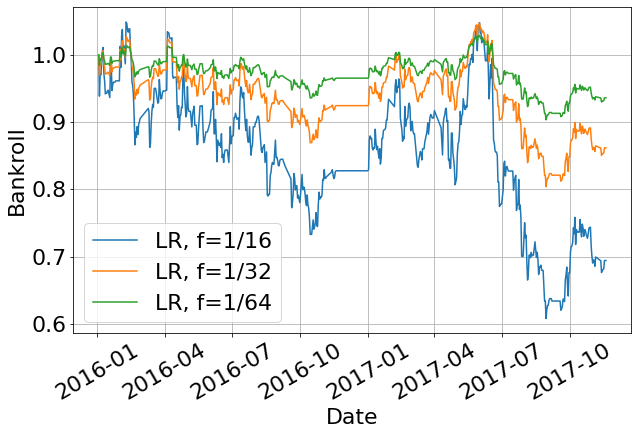

In [408]:
plt.plot(ds,kelly('lr', 1/16),label='LR, f=1/16')
plt.plot(ds,kelly('lr', 1/32),label='LR, f=1/32')
plt.plot(ds,kelly('lr', 1/64),label='LR, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_lr.pdf',bbox_inches='tight')

1.588976150341442
1.3302504401776405
1.1691485246666158


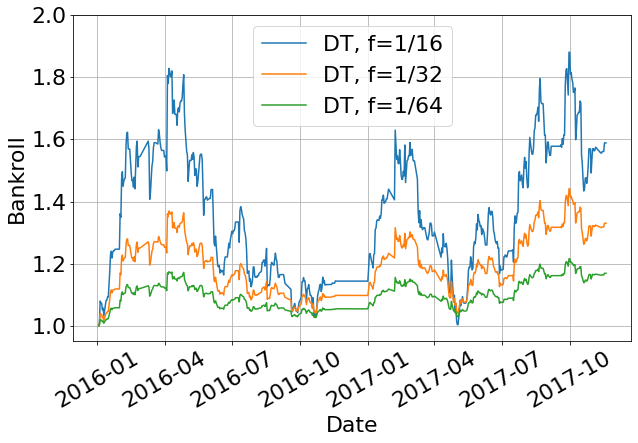

In [410]:
plt.plot(ds,kelly('dt', 1/16),label='DT, f=1/16')
plt.plot(ds,kelly('dt', 1/32),label='DT, f=1/32')
plt.plot(ds,kelly('dt', 1/64),label='DT, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.ylim(0.95,2)
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_dt.pdf',bbox_inches='tight')

1.178801831464006
1.1163377890240713
1.063969118624909


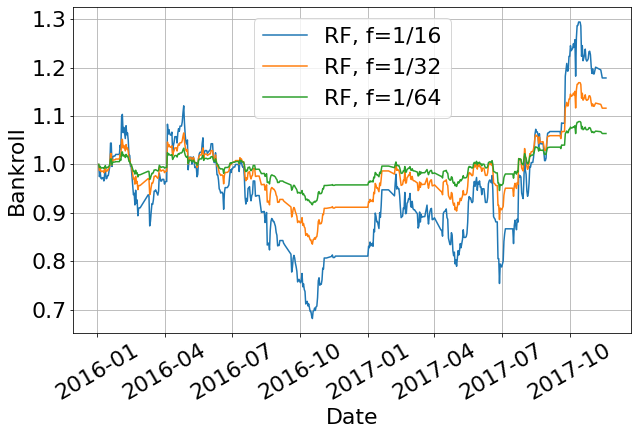

In [411]:
plt.plot(ds,kelly('rf', 1/16),label='RF, f=1/16')
plt.plot(ds,kelly('rf', 1/32),label='RF, f=1/32')
plt.plot(ds,kelly('rf', 1/64),label='RF, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_rf.pdf',bbox_inches='tight')

1.0056485939340603
1.036125403908767
1.026248775779203


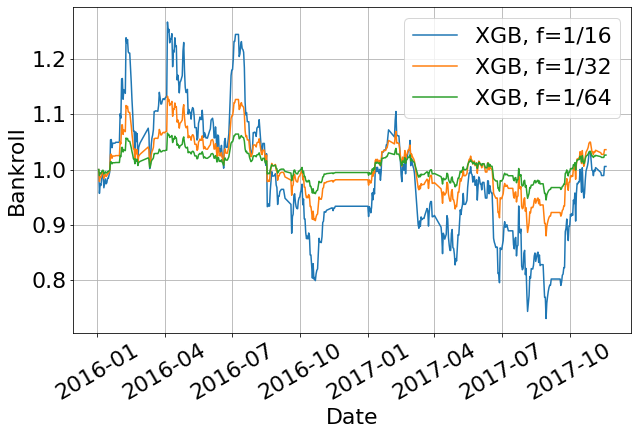

In [412]:
plt.plot(ds,kelly('xgb', 1/16),label='XGB, f=1/16')
plt.plot(ds,kelly('xgb', 1/32),label='XGB, f=1/32')
plt.plot(ds,kelly('xgb', 1/64),label='XGB, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_xgb.pdf',bbox_inches='tight')

1.036606804496528
1.0424448055333482
1.0270523566666627


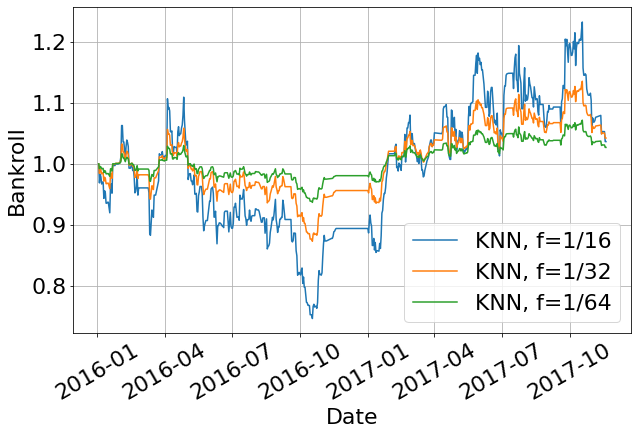

In [413]:
plt.plot(ds,kelly('knn', 1/16),label='KNN, f=1/16')
plt.plot(ds,kelly('knn', 1/32),label='KNN, f=1/32')
plt.plot(ds,kelly('knn', 1/64),label='KNN, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_knn.pdf',bbox_inches='tight')

0.6217066422988288
0.8354167991145104
0.9272289655387157


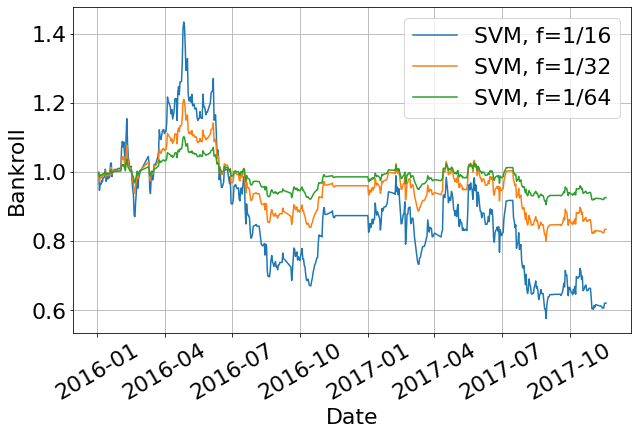

In [414]:
plt.plot(ds,kelly('svm', 1/16),label='SVM, f=1/16')
plt.plot(ds,kelly('svm', 1/32),label='SVM, f=1/32')
plt.plot(ds,kelly('svm', 1/64),label='SVM, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_svm.pdf',bbox_inches='tight')

0.006789749978471129
0.15748266808838493
0.46304699850444636


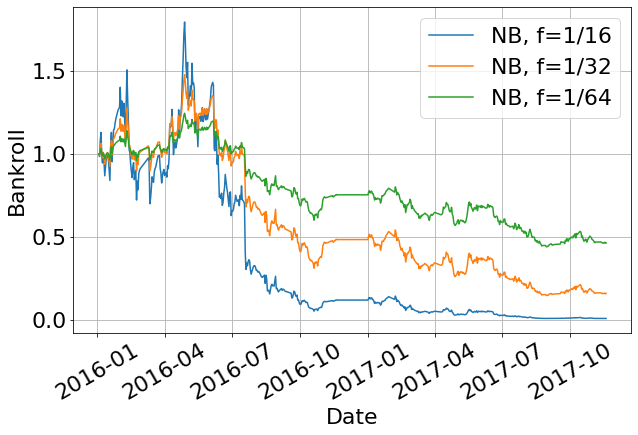

In [415]:
plt.plot(ds,kelly('nb', 1/16),label='NB, f=1/16')
plt.plot(ds,kelly('nb', 1/32),label='NB, f=1/32')
plt.plot(ds,kelly('nb', 1/64),label='NB, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_nb.pdf',bbox_inches='tight')

1.6397518890053688
1.332411625642696
1.1658713915555274


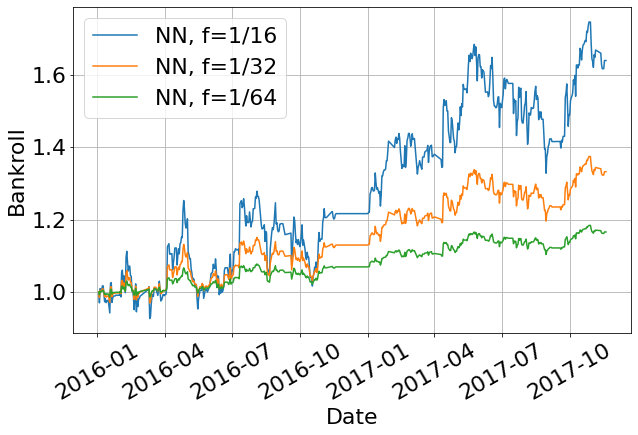

In [416]:
plt.plot(ds,kelly('nn', 1/16),label='NN, f=1/16')
plt.plot(ds,kelly('nn', 1/32),label='NN, f=1/32')
plt.plot(ds,kelly('nn', 1/64),label='NN, f=1/64')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\kelly_nn.pdf',bbox_inches='tight')

In [417]:
lasts = []
for f in np.linspace(1,40,100):
    lasts.append(kelly('nn', 1/f)[-1])

-5.3714166391455576e-17
5.602957295399501e-10
0.0002852134335512576
0.015282383260588762
0.10624407056727843
0.311813079728755
0.5945717212001511
0.8931837230098273
1.1648753541730752
1.390936665645056
1.5684465990460708
1.7020978617619622
1.7991768318523753
1.8670843460305904
1.9123331156223817
1.9402777519449126
1.9551630621996612
1.9602853147785746
1.9581738867859524
1.950756390287248
1.9394960469306692
1.9255009740362998
1.909609027151231
1.892452778524343
1.8745089225564182
1.8561357133464595
1.8376013061523575
1.8191052252608766
1.8007946504678514
1.7827767990192918
1.7651283620569096
1.7479027146568138
1.7311354387049278
1.7148485635440271
1.6990538291417097
1.6837552017610398
1.668950816228423
1.6546344770217016
1.6407968189402953
1.6274262044066627
1.6145094165140104
1.60203219332494
1.589979638559846
1.5783365358913344
1.567087587984996
1.556217596750802
1.545711597659437
1.5355549581814185
1.525733448234737
1.5162332888339347
1.5070411838113245
1.4981443384451314
1.489530468

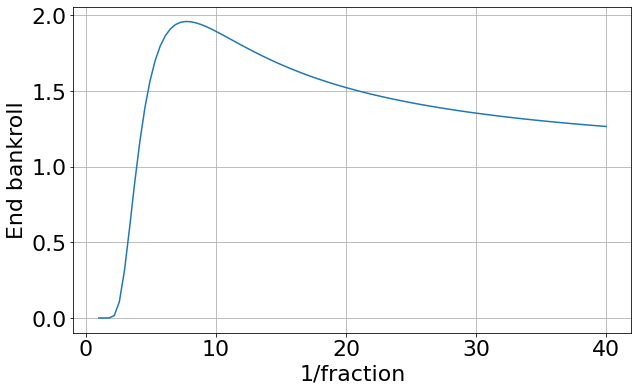

In [419]:
plt.plot(np.linspace(1,40,100), lasts)
plt.ylabel('End bankroll')
plt.xlabel('1/fraction')
plt.grid()
plt.savefig(r'img\\Betting\\kelly_on_f.pdf',bbox_inches='tight')

## Uncertainty shrinkage

In [421]:
def shrinkage(model, sigma):
    money = 1
    all_returns = [1]
    

    for day in days:
        d = data2[data2['Date'] == day]

        returns = []

        for index, row in d.iterrows():

            if max(row['winner_'+model], row['loser_'+model]) > max(row['winner_bet_proba'],row['loser_bet_proba']): #we make a bet
                if row['winner_'+model] > row['loser_'+model]: #we make a bet and win
                    bet = money * (row['winner_'+model]*row['PSW']-1)**3/((row['PSW']-1)*(row['winner_'+model]*row['PSW']-1)**2 + row['PSW']**2*sigma)
                    r = row['B365W'] * bet - bet
                else:
                    bet = money * (row['loser_'+model]*row['PSL']-1)**3/((row['PSL']-1)*(row['loser_'+model]*row['PSL']-1)**2 + row['PSL']**2*sigma)
                    r = - bet
            else:
                r = 0

            returns.append(r)

        money = money + sum(returns)   
        all_returns.append(money)
        
    print(money)
    return all_returns

0.02558006631619275
0.5488691421161287
0.7106536106838506


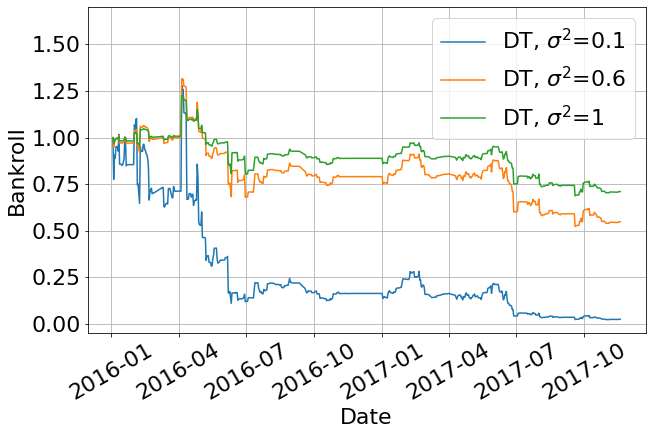

In [429]:
plt.plot(ds,shrinkage('lr', 0.1), label = 'DT, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('lr', 0.6), label = 'DT, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('lr', 1), label = 'DT, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.ylim(-0.05,1.7)
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_lr.pdf',bbox_inches='tight')

0.00019454831978996557
0.41742934670764764
0.7520318565875429


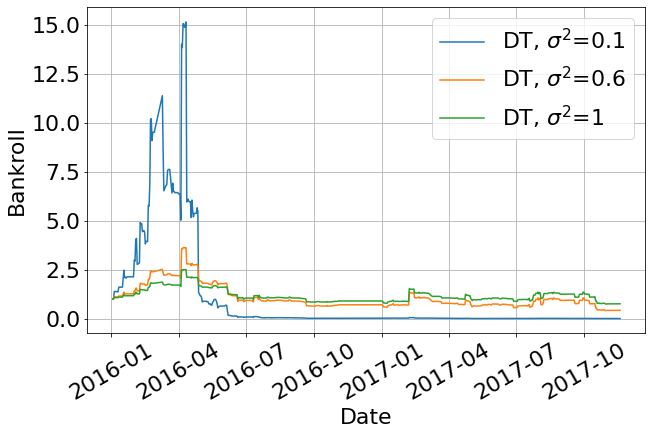

In [427]:
plt.plot(ds,shrinkage('dt', 0.1), label = 'DT, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('dt', 0.6), label = 'DT, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('dt', 1), label = 'DT, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_dt.pdf',bbox_inches='tight')

0.09408022001387718
0.7522161513589555
0.8662715678725389


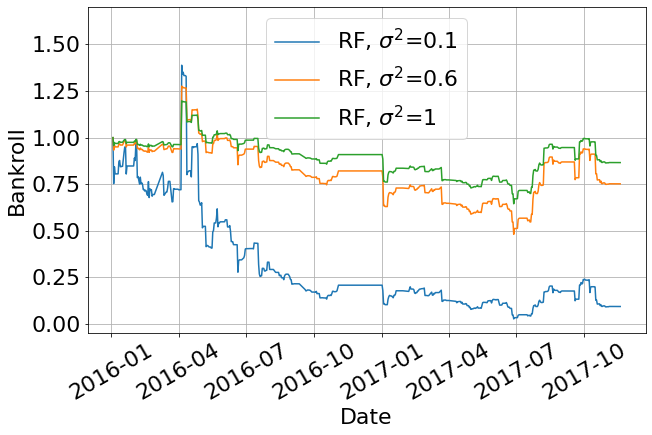

In [431]:
plt.plot(ds,shrinkage('rf', 0.1), label = 'RF, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('rf', 0.6), label = 'RF, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('rf', 1), label = 'RF, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.ylim(-0.05,1.7)
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_rf.pdf',bbox_inches='tight')

0.11427766520921268
0.844369283123121
0.9406660074161985


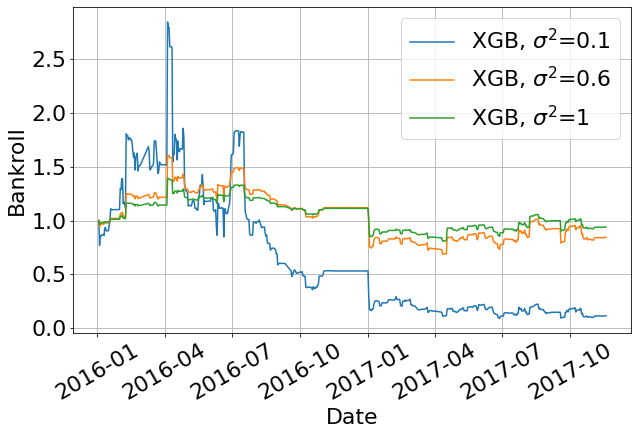

In [432]:
plt.plot(ds,shrinkage('xgb', 0.1), label = 'XGB, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('xgb', 0.6), label = 'XGB, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('xgb', 1), label = 'XGB, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()

plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_xgb.pdf',bbox_inches='tight')

0.16981802478884694
0.8172925784959448
0.909662596824989


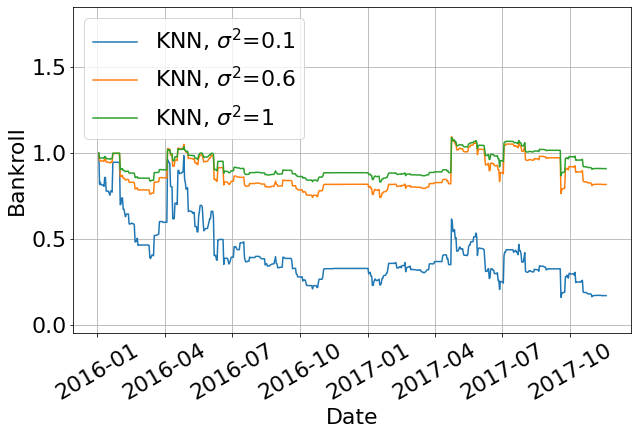

In [442]:
plt.plot(ds,shrinkage('knn', 0.1), label = 'KNN, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('knn', 0.6), label = 'KNN, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('knn', 1), label = 'KNN, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()
plt.ylim(-0.05,1.85)
plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_knn.pdf',bbox_inches='tight')

0.00045099796361345733
0.28528348543524235
0.4833119496334007


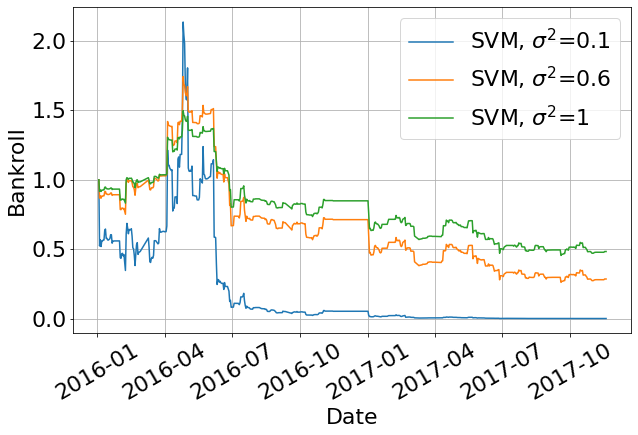

In [444]:
plt.plot(ds,shrinkage('svm', 0.1), label = 'SVM, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('svm', 0.6), label = 'SVM, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('svm', 1), label = 'SVM, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()

plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_svm.pdf',bbox_inches='tight')

1.5328728943782453e-29
8.147098761482436e-13
8.86862037810168e-06


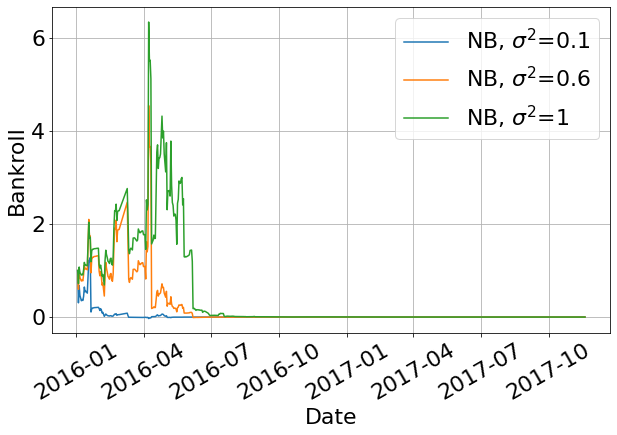

In [446]:
plt.plot(ds,shrinkage('nb', 0.2), label = 'NB, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('nb', 0.6), label = 'NB, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('nb', 1), label = 'NB, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()

plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_nb.pdf',bbox_inches='tight')

0.8605278179150707
1.4428450139266966
1.3179344309939094


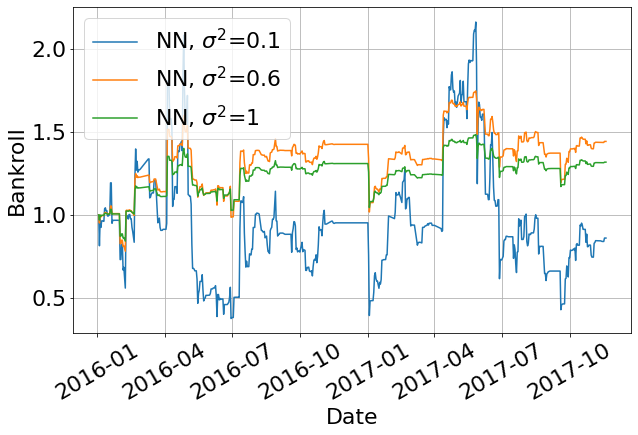

In [447]:
plt.plot(ds,shrinkage('nn', 0.1), label = 'NN, $\sigma^2$=0.1')
plt.plot(ds,shrinkage('nn', 0.6), label = 'NN, $\sigma^2$=0.6')
plt.plot(ds,shrinkage('nn', 1), label = 'NN, $\sigma^2$=1')
plt.ylabel('Bankroll')
plt.xlabel('Date')
plt.grid()

plt.legend()
plt.xticks(rotation=30)
plt.savefig(r'img\\Betting\\shrinkage_nn.pdf',bbox_inches='tight')

In [448]:
lasts = []
for s in np.linspace(0.01,4,100):
    lasts.append(shrinkage('nn', s)[-1])

4.43334132923174e-06
0.18937858202379615
0.7468567172512585
1.148724054663685
1.3656941659884554
1.473592028738574
1.522807939435037
1.540568937093478
1.5413154998858336
1.5328541391104802
1.5195126517717934
1.5037435887966608
1.4869580939670082
1.4699730522958103
1.4532583885394847
1.4370777743215366
1.4215707170609875
1.4068014897579129
1.3927888210617223
1.3795241683599373
1.3669830817143982
1.3551323154584671
1.3439342851727338
1.333349848178
1.323340015868006
1.3138669814236783
1.304894707577338
1.2963892320334034
1.2883187928581397
1.2806538406281687
1.273366981079239
1.266432876914745
1.2598281274970915
1.2535311385628802
1.2475219897283676
1.241782304639441
1.2362951266833286
1.2310448018963627
1.2260168698584233
1.2211979628177647
1.2165757129426344
1.2121386673833723
1.2078762107062249
1.2037784941972827
1.1998363715119624
1.1960413401470666
1.1923854882305682
1.1888614461510933
1.185462342581134
1.1821817644821775
1.179013720714219
1.1759526089054402
1.172993185269667
1.1701

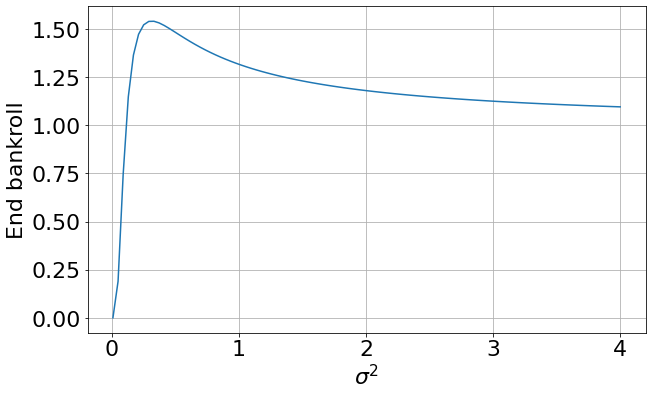

In [450]:
plt.plot(np.linspace(0.01,4,100), lasts)
plt.xlabel('$\sigma^2$')
plt.ylabel('End bankroll')
plt.grid()
plt.savefig(r'img\\Betting\\shrinkage_on_sigma.pdf',bbox_inches='tight')